# Angewandte Statistik II - INF4151
Sommersemester 2018

In [12]:
# general imports
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

## Ziele
Statistik-Werkzeuge mit denen der wissenschaftliche Alltag bearbeitet wird.

* Kennenlernen
* Verstehen
    * dazu Theorie
* Anwendunsbereiche
* Anwenden
* Programmieren
* Ergebnis
    * interpretieren und darstellen

# Über mich

Physiker, Biologe, Elektroingenieur, Administrator, Postdoc.

Lehrstuhl ***Neuronale Informationsverarbeitung***
http://www.nip.uni-tuebingen.de/home.html

# Über Sie

#### Studiengang?

#### Was sind Ihre Vorkenntnisse in

1. Mathematik (Lineare Algebra, Analysis)
2. Statistik (Angewandte Statistik I; Beispiele folgen)
3. Programmieren mit Python
4. Notebooks

#### Was sind Ihre Erwartungen?
Spezielle Problemstellung?

# Rückblick *Angewandte Statistik I*

- Grundlagen der Statistik
- Inferenz
    - Punktschätzer
    - Nullhypothesen-Signifikanz-Test, Vertrauensintervalle
    - Lineare Modelle *OLS*
    - ...

# Übersicht *Angewandte Statistik II*

- Generalisierte Lineare Modelle *generalized linear models: GLM* 广义线性模型
- Hauptkomponentenanalyse *principal components analysis: PCA* 主成分分析
- Unabhängige-Komponenten-Analyse *independent components analysis: ICA* 独立成分分析
- Bayes Statistik
    - Vergleich mit frequentistischer Statistik: Tests und Vertrauensintervalle
    - Psychophysik

1. 广义线性模型 GLM

2. 主成分分析 PCA

3. 独立成分分析 ICA

4. 贝叶斯统计 Bayes


# Wiederholung Grundlagen der Statistik

## Zufallsvariable & Wahrscheinlichkeitsraum  $(\Omega, \Sigma, P)$

(Quelle: Wikipedia. Authorin: Frau Holle Joxemai4, CC BY-SA 3.0)


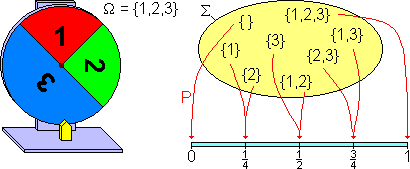

- Ergebnisraum $\Omega = \{\omega_i\}$: Menge aller Ergebnisse
- Ereignisraum $\Sigma$, bestehend aus allen möglichen Kombinationen aus $\Omega$
- Wahrscheinlichkeitsmaß $P$
    - ordnet jedem Ereignis aus $\Sigma$ eine Wahrscheinlichkeit $P$ zu

## Kolmogorov-Axiome
Andrei Kolmogorov (1930er Jahre);
In Übereinstimmung mit alltäglicher Erfahrung und Umgangssprache:

Gesamtheit
$$P(\Omega)=1$$

Unmögliches Ereignis
$$P(\emptyset)=0$$

Wahrscheinlichkeiten
$$0 \leq P(A) \leq 1$$

Eintreten oder Nichteintreten eines Ereignisses
$$P(A) + P(\bar{A}) = 1$$

Disjunkte Ereignisse-不相交事件
$$P(A\cup B) = P(A) + P(B) \quad \text{falls}\; A\cap B=\emptyset$$

σ-Additivität-
$$\sum_{i=1}^n P(\omega_i) = 1$$
$$\omega_i \cap \omega_j = \emptyset \;\;\;\; \forall i\neq j$$
$$P\left(\omega_1\;\cup \;\omega_2\;\cup\cdots\right) = \sum P(\omega_i)$$

## diskrete Wahrscheinlichkeits-(Modell-)Verteilungen
- Laplace-Verteilung - 拉布拉斯分布
- Bernoulli-Verteilung - 伯努利分布
- Binomialverteilung - 二项式分布
- Multinomialverteilung - 多项式分布
- Poissonverteilung - 泊松分布

## Erwartungswert - 期望

Sei $X$ eine diskrete Zufallsvariable mit Ergebnissen (Elementarereignissen) $x_i$ $\; i\in\{1,2,\dots, N\}$ <br>
und deren Wahrscheinlichkeitsverteilung $P(X\!=\!x)$, Abkürzung $p_i=p(X\!=\!x_i)$,<br>
dann ist der **Erwartungswert** von $X$
$$\mathcal{E}(X) = \mu_X = \sum_{i=1}^N p_i\cdot x_i$$

## Varianz - 方差

Sei $X$ eine diskrete Zufallsvariable mit Ergebnissen $x_i$ $\; i\in\{1,2,\dots, N\}$,<br>
Erwartungswert $\mu$ und <br>
Wahrscheinlichkeitsverteilung $P(X=x)$, Abkürzung $p_i=p(X=x_i)$, <br>
dann ist die **Varianz** von $X$

$$Var(X) = \sigma^2 = \sum_{i=1}^N p_i(x_i-\mu)^2$$

und die **Standardabweichung** von $X$ - 标准差

$$\mathrm{std}(X) = \sigma = \sqrt{Var(X)}$$

Erweiterung auf *kontinuierliche* Wahrscheinlichkeitsverteilungen

## Wahrscheinlichkeitsdichte $f(x)$
(*probability density function, pdf*)
$$f(x) \geq 0 \qquad \text{möglich: }\;f(x) \nleq 1$$

$$P(a\leq x \leq b) =  \int_{a}^{b} f(x)\;\mathrm{d}x \;\leq 1$$

#### Normierung - 标准化
$$\int_{x=-\infty}^{\infty} f(x)\mathrm{d}x = 1$$

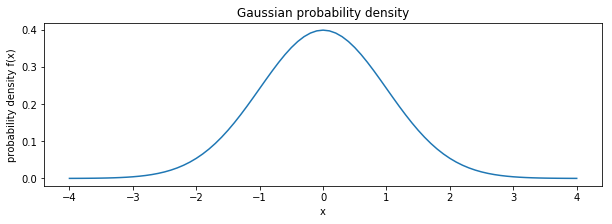

In [6]:
'''Gaussian probability density function'''
plt.figure(figsize=(10, 3))
x = np.linspace(-4, 4, 80+1)
plt.plot(x, stats.norm(0, 1).pdf(x))
plt.title('Gaussian probability density')
plt.xlabel('x')
plt.ylabel('probability density f(x)');

## Kontinuierliche Wahrscheinlichkeitsverteilungen - 连续概率分布
- Rechteckverteilung - 矩形分布
- Normalverteilung - 正态分布
- Exponentialverteilung - 指数分布
- Cauchy-Verteilung - 柯西分布
- $\chi^2$- Verteilung - $\chi^2$分布
- Fisher F-Verteilung - 费舍尔F分布

### Wahrscheinlichkeitsfunktion $F(x)$
(*cumulated distribution function, cdf*) - 累积分布函数

Die kumulierte Wahrscheinlichkeit bis zum Punkt x ist 
$$F(x) = \int_{x'=-\infty}^{x'=x} f(x')\mathrm{d}x'$$

Damit
$$F(-\infty) = 0 \qquad F(+\infty) = 1$$

Endliche Wahrscheinlichkeit im Intervall - 区间内的概率计算
$$P(a\leq x \leq b) =  F(b) - F(a)$$
Punktwahrscheinlichkeit
$$P(a) =  F(a) - F(a) = 0$$

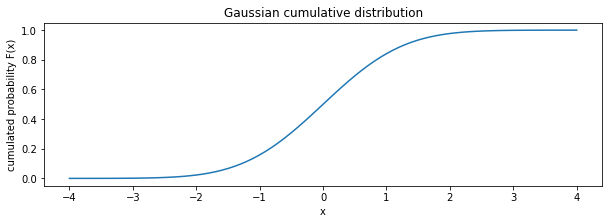

In [8]:
'''Gaussian cumulative distribution function'''
plt.figure(figsize=(10, 3))
x = np.linspace(-4, 4, 80+1)
plt.plot(x, stats.norm(0, 1).cdf(x))
plt.title('Gaussian cumulative distribution')
plt.xlabel('x')
plt.ylabel('cumulated probability F(x)');

Sei $X$ eine Zufallsvariable auf $\mathbb{R}$ mit Wahrscheinlichkeitsdichte $f(x)$, dann

## Erwartungswert
$$\mathcal{E}(X) = \mu = \int_{-\infty}^{\infty} f(x)\cdot x\; \mathrm{d}x$$

## Varianz
$$\begin{aligned}
Var(X) = \sigma^2 & = \int_{-\infty}^{\infty} (x-\mu)^2\cdot f(x) \mathrm{d}x \\
& = \mathcal{E}\left((x-\mu)^2\right) = \mathcal{E}(x^2)-\bigl(\mathcal{E}(x)\bigr)^2
\end{aligned}$$


## Sätze der Statistik

#### Gesetz der großen Zahlen

Das arithmetische Mittel(算数平均值) $\overline{X}_n = \frac{1}{n}\sum_{i=1}^n X_i$  konvergiert(收敛) *nach Wahrscheinlichkeit* gegen den Erwartungswert $\mathcal{E}(\overline{X}_n) = \mathcal{E}(X)=\mu$:

Für eine beliebig kleine Konstante $c>0$ gilt
$$P(|\overline{X}_n-\mu|\leq c) \;\xrightarrow{n\rightarrow\infty}\; 1$$

#### Theorem von Bernoulli

Sei $X$ eine diskete Zufallsvariable mit möglichen Ereignissen $x_j$ mit Wahrscheinlichkeit $p_j=p(X\!=\!x_j)$. 

Dann gilt für die relative Häufigkeit $h_j$, mit der das Ereignis $x_j$ eintritt:

$$h_j \;\xrightarrow{n\rightarrow\infty}\; p(X\!=\!x_j)$$ 

#### Hauptsatz der Statistik, Satz von Gliwenko-Cantelli

Sei $X$ eine Zufallsvariable mit Verteilungsfunktion $F(x)$ <br>
und $\{X_i\}$ mit $i\in\{1\dots N\}$ *i.i.d.* Wiederholungen. 独立同分布

Dann konvergiert die relative Häufigkeit $F_n(x)$, daß $X_i\leq x$ gegen $F(x)$ nach Wahrscheinlichkeit:
<br>
$$P(sup|F_n(x)-F(x)|\leq c) \;\xrightarrow{n\rightarrow\infty}\;1$$

#### Zentraler Grenzwertsatz

Seien $X_i$ unabhängig identisch verteilte Zufallsvariablen mit Erwartungswert 期望
$$\mathcal{E}(X_i) = \mu$$
und Varianz 方差
$$Var(X_i) = \sigma^2$$
dann konvergiert die Verteilungsfunktion 收敛分布函数
$$F_n(z)=P(Z_n\leq z)$$
der standardisierten Summe 标准化总和
$$Z_n = \frac{1}{\sqrt{n}}\sum_{i=1}^n\frac{X_i-\mu}{\sigma}$$
für $n\rightarrow\infty$ an jeder Stelle $z\in\mathbb{R}$ gegen die Verteilungsfunktion der **Standardnormalverteilung**标准正态分布

$$F_n(z)\;\xrightarrow{n\rightarrow\infty}\;\Phi(z)$$
Kurz:
$$Z_n \stackrel{a}{\sim} \mathcal{N}(0, 1)$$

sinus has mean= 0.000 and std= 0.993
triangle has mean=-0.083 and std= 0.975
square  has mean=-0.002 and std= 1.000
mixture  has mean=-0.049 and std= 0.837


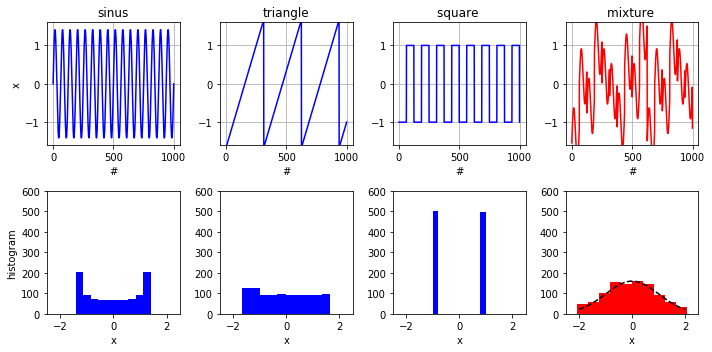

In [24]:
'''central limit theoreme - even for non i.i.d. mixtures'''
x = np.linspace(0, 16, 1000)
f = plt.figure(figsize=(10, 5))
sinus = 1.41*np.sin(2.*np.pi*x) # sine wave distributio
triangle=(x%5-2.5)/1.5          # sawtooth distribution
square = 2*((x%2)>1.0)-1.       # rectangular distribu
mixture=1./np.sqrt(3)*(sinus+triangle+square) # normaliz
cols = ['b', 'b', 'b', 'r']     # colors for plotting
names = ['sinus', 'triangle', 'square ', 'mixture ']
for i, curve in enumerate([sinus, triangle, square, mixture]):
    f.add_subplot(2, 4, 1+i)    # i_th plot upper row
    plt.title(names[i])
    plt.grid(True)
    plt.plot(curve, cols[i])    # plot of i-th curve
    plt.ylim(-1.6, 1.6)
    plt.xlabel('#')
    if i==0:
        plt.ylabel('x')
    f.add_subplot(2, 4, 5+i)    # i_th plot lower row
    plt.xlabel('x')
    if i==0:
        plt.ylabel('histogram')
    plt.axis((-2.5, 2.5, 0, 600))
    plt.hist(curve, color=cols[i]) # histogram of i-th cur
    print('{} has mean={:6.3f} and std={:6.3f}'
          .format(names[i], np.mean(curve), np.var(curve)))

x = np.linspace(-2, 2, 401)
# and for comparison of mixture: add standard normal to last plot
plt.plot(x, 400*stats.norm.pdf(x), 'k--')
plt.tight_layout()

### Ergebnis
- Endlicher Erwartungswert $\mu$ - 有限的期望
- Endliche Varianz $\sigma^2$ - 有限的方差
- identische, unabhängige Wiederholungen - 一致、不关联重复

Modell für Zufallvariable erlaubt statistische Schlußfolgerungen 统计结果

Stochastik (*ars conjectandi*) 随机指标

# Philosophie der Vorlesung
### Voraussetzungen
- Mathematik
    - Lineare Algebra 
    - Analysis
- Python
    - matplotlib
    - numpy
    - scipy.stats
    - statsmodels `ols`
- Angewandte Statistik I
    - Zufallsvariable: 
        - Verteilungen: $\mathcal{N}$, Student-$t$, $\chi^2$, ...
        - Erwartungswert, Varianz, Streuung
    - Sätze der Statistik: Zentraler Grenzwertsatz
    - Punktschätzer, Tests, Konfidenzintervalle
    - Lineare Modelle und deren Lösungsansätze: *OLS* 
    - Likelihood und Log-Likelihood-Methode, Max-Likelihood-Schätzer

### Ziel
- Methoden 
    - kennenlernen und verstehen
    - anwenden
    - Grenzen kennen
- Mathematik
    - kennenlernen 
    - *prinzipielles* Verständnis
    - i.A. **nicht** in Prüfung 

### Übungen
- Komplexere Fragen, Diskussion
- Besprechen der Aufgaben
- Programmierbeispiele
- Erweiterungen

# Formalien

## Links

#### Homepage *Neuronale Informationsverarbeitung*
http://www.nip.uni-tuebingen.de/teaching/lectures-seminars/summer-term-2018.html

#### Informatik
http://www.wsi.uni-tuebingen.de/studium

## ilias

- Veranstaltungen
    - Sommersemester 2018 
        - 7 Mathematisch-Naturwissenschaftliche Fakultät
            - Informatik 
                - Neuronale Informationsverarbeitung (Prof. Wichmann)
                    - Angewandte Statistik II (SoSe 2018)


#### Anmeldung mit Passwort

#### Ordner

- Folien der Vorlesung
- Literatur
- Übungsaufgaben

#### Kommunikation

- Sammel-Email 
- Forum für Fragen *und* Antworten
- Abgabe der Übungsaufgaben per Email mit Anhang

## Übungsaufgaben
- **Angewandte** Statistik
- Zu Ihrer eigenen Verständnisvertiefung
- jede / jede zweite Woche
- Besprechung in der Übungsstunde
- Voraussetzung für Teilnahme an Prüfung: 50% richtig bearbeitet
    - Bonusregelung
- Nicht Teil der Benotung

## Klausur 
- Schriftliche Klausur
- Termin: Mittwoch 1. August 2018
- Uhrzeit 14:15
- Dauer: 90 Minuten
- Ort: Hörsaal 1 F119
- Zulassungsvoraussetzung: 50% der Punkte aus den Übungsaufgaben

#### Anmeldung zur Klausur
- abhängig vom Studienfach

# Literatur
#### in der UB mehrfach vorhandene Bücher: Einführung in Statistik zur Wiederholung
- Fahrmeir, Künstler, Pigeot, Tutz: Statistik. Springer-Verlag Berlin Heidelberg, 6. Auflage 2007
- Stahel: Statistische Datenanalyse. Vieweg&Sohn, 5. Auflage 2008

#### Bücher
- Dobson, Barnett: An Introduction to Generalized Linear Models. Chapman&Hall/CRC, 3rd ed. 2008
- McCullagh, Nelder: Generalized Linear Models. Chapman&Hall/CRC, 2nd ed. 1989
- Hyvärinen, Hurri, Hoyer: Natural Image Statistics - A Probabilistic Approach to Early Computational Vision. Springer 2009
- Kruschke: Doing Bayesian Data Analysis: A Tutorial with R, JAGS, and Stan. Academic Press/Elsevier, 2nd ed. 2014

#### Wissenschaftliche Artikel, Quellen im Internet
- zu den einzelnen Kapiteln

## Python, Notebooks, ...
- http://nb.bianp.net/sort/views/
- http://nbviewer.jupyter.org/gist/rpmuller/5920182
- http://nbviewer.jupyter.org/github/pybokeh/ipython_notebooks/blob/master/matplotlib/Matplotlib.ipynb
- http://nbviewer.jupyter.org/github/jorisvandenbossche/2015-PyDataParis/blob/master/pandas_introduction.ipynb

    # packages in environment  (conda list)
    python                    3.6.5                hc3d631a_0  
    ipython                   6.3.1                    py36_0  
    jupyter                   1.0.0                    py36_4  
    jupyter_core              4.4.0            py36h7c827e3_0  
    notebook                  5.4.1                    py36_0  
    matplotlib                2.2.2            py36h0e671d2_1  
    scipy                     1.0.1            py36hfc37229_0 
    numpy                     1.14.2           py36hdbf6ddf_1
    pandas                    0.22.0           py36hf484d3e_0  
    patsy                     0.5.0                    py36_0 
    statsmodels               0.8.0            py36h8533d0b_0   
    libgcc                    7.2.0                h69d50b8_2 

# Terminübersicht
(vorläufig)

| Datum            | Titel
| :-               | :-------------
| `18. April 2018` | Einführung, Rückblick *Angewandte Statistik I*
| `25. April 2018` | GLM
| `02. Mai   2018` | GLM
| `09. Mai   2018` | PCA
| `16. Mai   2018` | PCA
| `23. Mai   2018` | ICA
| `30. Mai   2018` | ICA
| `06. Juni  2018` | (Pfingsten)
| `13. Juni  2018` | Bayes
| `20. Juni  2018` | Bayes
| `27. Juni  2018` | Bayes
| `04. Juli  2018` | Bayes
| `11. Juli  2018` | Kausalität
| `18. Juli  2018` | Psychophysik: Psignifit
| `25. Juli  2018` | Repetorium
